# 对抗生成网络与神经网络风格迁移的结合



In [0]:
import tensorflow as tf
import keras as k
print(tf.__version__,k.__version__)

1.14.0 2.2.4


Using TensorFlow backend.


## 概述

大家经过这几天对 NST（神经网络风格迁移）和DCGAN（深度卷积神经网络）的学习，已经对这两个经典的机器学习模型有了一定的认知。接下来我们就讲这两个技术进行结合。

## 环境搭建


###  所需包的导入

In [0]:
from __future__ import print_function, division
import keras
from keras.preprocessing.image import load_img, save_img, img_to_array
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import sys,os
import numpy as np
import sys

Using TensorFlow backend.


###  数据下载与准备

In [0]:
if not os.path.exists('DeepFlying'):
    os.makedirs('DeepFlying') 

if not os.path.exists('NST/data'):
    os.makedirs('NST/data') 

if not os.path.exists('GAN/models'):
    os.makedirs('GAN/models') 

!wget -q https://github.com/JChrysanthemum/deepflying/raw/master/InnoCamp/NST/pics/content.png -O NST/data/c1.png
!wget -q https://github.com/JChrysanthemum/deepflying/raw/master/InnoCamp/NST/pics/style.jpg -O NST/data/s1.jpg
!wget -q https://github.com/JChrysanthemum/deepflying/raw/master/InnoCamp/GANS/models/models.zip -O GAN/models/models.zip
!wget -q https://github.com/JChrysanthemum/deepflying/raw/master/DraftVersion/NST/styleTransfer.py -O DeepFlying/styleTransfer.py
!unzip -o GAN/models/models.zip -d GAN/models/

import DeepFlying.styleTransfer as st

Archive:  GAN/models/models.zip
  inflating: GAN/models/bag.h5       
  inflating: GAN/models/coat.h5      
  inflating: GAN/models/dress.h5     
  inflating: GAN/models/pullover.h5  
  inflating: GAN/models/ReadMe.md    
  inflating: GAN/models/sandal.h5    
  inflating: GAN/models/shirt.h5     
  inflating: GAN/models/sneaker.h5   
  inflating: GAN/models/ankle_boot.h5  


## 代码编写

### 参数定义

In [0]:
st.target_image_path = "gan.png"
st.style_reference_path = "NST/data/style.jpg"

#@markdown 迭代次数
st.iter_size = 10 #@param {type:"slider", min:10, max:200, step:5}
#@markdown 生成器模型
generator_path = 'shirt' #@param ['ankle_boot', 'bag', 'coat', 'dress','pullover','sandal','shirt','sneaker','trouser']
generator_path = 'GAN/models/'+ generator_path + '.h5'


### 构造生成器

W0619 14:17:27.819039 140313428412288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 14:17:27.871516 140313428412288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 14:17:27.902208 140313428412288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0619 14:17:27.947592 140313428412288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 14:1

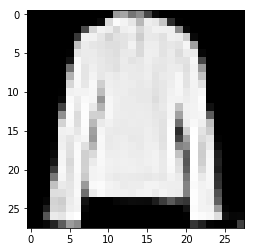

In [0]:
class Generator:
    def __init__(self):
        self.generator = keras.models.load_model(generator_path)
        self.generator.trainable =False
        

    def save_imgs(self):

        noise = np.random.normal(0, 1, (1, 100))
        gen_imgs = self.generator.predict(noise)
        
        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        # Write these images to files
        fig, axs = plt.subplots(1,1)
        plt.imshow(gen_imgs[ 0, :, :, 0], cmap='gray')
        gen_imgs=cv2.cvtColor(gen_imgs[ 0, :, :, 0],cv2.COLOR_GRAY2BGR)*255
        
        cv2.imwrite("gan.png",gen_imgs)

        return gen_imgs
      
generator = Generator()
img = generator.save_imgs()



### 进行风格迁移

W0619 14:17:36.373698 140313428412288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



80142336/80134624 [==============================] - 3s 0us/step


W0619 14:17:41.566132 140313428412288 variables.py:2429] Variable += will be deprecated. Use variable.assign_add if you want assignment to the variable value or 'x = x + y' if you want a new python Tensor object.
W0619 14:17:41.764086 140313428412288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[90%][==================  ]
Image saved as NST.png 



None


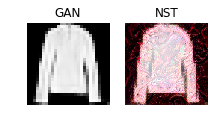

In [0]:

print(st.main())

gan = load_img("gan.png")
gan = img_to_array(gan)
gan = np.array(gan, np.uint8)

nst = load_img("NST.png")
nst = img_to_array(nst)
nst = np.array(nst, np.uint8)

plt.figure(figsize=(5, 6))
plt.subplot(2, 3, 1), plt.title('GAN')
plt.axis('off')
plt.imshow(gan)
plt.subplot(2, 3, 2), plt.title('NST')
plt.axis('off')
plt.imshow(nst)
plt.show()